[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2267
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0685
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0402
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0310
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0212
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0150
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0169
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0138
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0108
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0128
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0103
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0097
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0082
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0093
Epoch 15/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0075
Epoch 16/20
18/

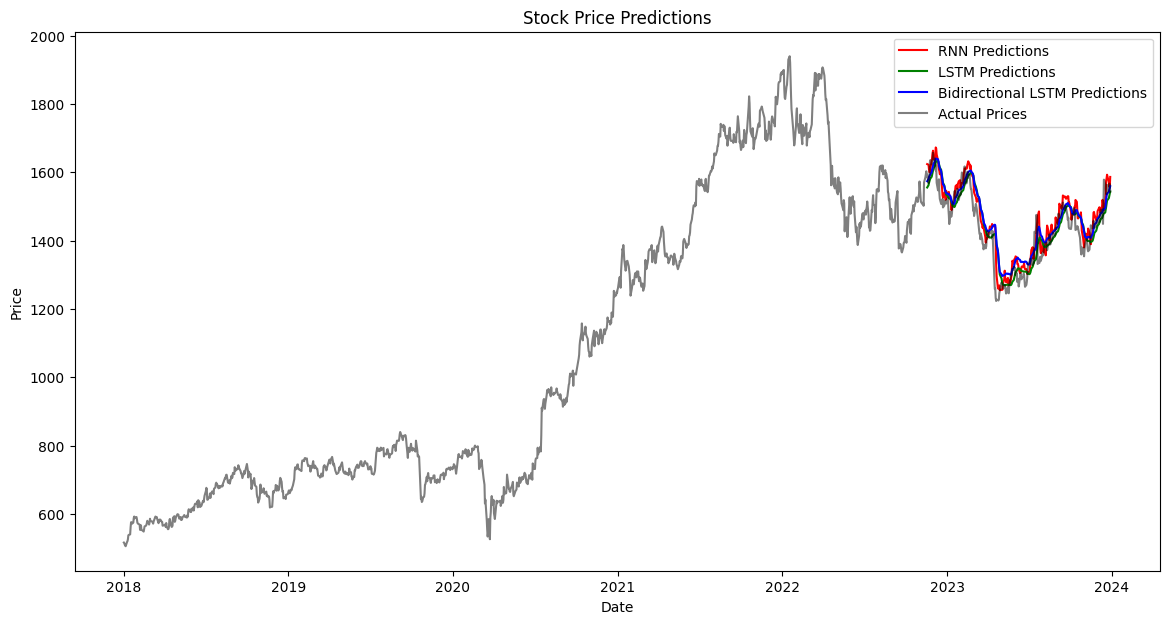

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Bidirectional
from keras.layers import Dropout
import yfinance as yf

# Step 1: Load the data
ticker = 'INFY.NS'
data = yf.download(ticker, start='2018-01-01', end='2023-12-31')
data = data['Close']  

# Step 2: Preprocessing the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

def create_dataset(dataset, time_step=100):
    X_data, Y_data = [], []
    for i in range(len(dataset)-time_step-1):
        X_data.append(dataset[i:(i+time_step), 0])
        Y_data.append(dataset[i+time_step, 0])
    return np.array(X_data), np.array(Y_data)

time_step = 100
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training (80%) and testing (20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Model 1: Simple RNN
def build_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Model 2: LSTM
def build_lstm():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Model 3: Bidirectional LSTM
def build_bidirectional_lstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(50, return_sequences=False)))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and predict for each model
def train_and_predict(model, X_train, Y_train, X_test):
    model.fit(X_train, Y_train, epochs=20, batch_size=64, verbose=1)
    
    # Predict on the test set
    test_predictions = model.predict(X_test)
    
    # Scale back the predictions to original values
    test_predictions = scaler.inverse_transform(test_predictions)
    
    return test_predictions.flatten()

# Train and predict with each model
rnn_model = build_rnn()
lstm_model = build_lstm()
bidirectional_lstm_model = build_bidirectional_lstm()

rnn_predictions = train_and_predict(rnn_model, X_train, Y_train, X_test)
lstm_predictions = train_and_predict(lstm_model, X_train, Y_train, X_test)
bidirectional_lstm_predictions = train_and_predict(bidirectional_lstm_model, X_train, Y_train, X_test)

# Step 4: Print the results
print("RNN Predictions :", rnn_predictions)
print("LSTM Predictions :", lstm_predictions)
print("Bidirectional LSTM Predictions :", bidirectional_lstm_predictions)

# Step 5: Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size + time_step + 1:], rnn_predictions, label='RNN Predictions', color='red')
plt.plot(data.index[train_size + time_step + 1:], lstm_predictions, label='LSTM Predictions', color='green')
plt.plot(data.index[train_size + time_step + 1:], bidirectional_lstm_predictions, label='Bidirectional LSTM Predictions', color='blue')
plt.plot(data.index, data.values, label='Actual Prices', color='black', alpha=0.5)
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
